# **CONVOLUTIONAL NEURAL NETWORKS**
In the Artificial Neural Networks we saw that we have three kind of layers in ANN:

**1. Input Layer**

**2. Hidden Layer**

**3. Output Layer**

The data is fed into the model and output from each layer is obtained from the above step is called feedforward, we then calculate the error using an error function, some common error functions are cross-entropy, square loss error, etc. The error function measures how well the network is performing. After that, we backpropagate into the model by calculating the derivatives. This step is called Backpropagation which basically is used to minimize the loss.

**Convolutional Neural Network** (CNN) is the extended version of artificial neural networks (ANN)


### **CNN Architecture**
Convolutional Neural Network consists of multiple layers like the input layer, Convolutional layer, Pooling layer, and fully connected layers. 

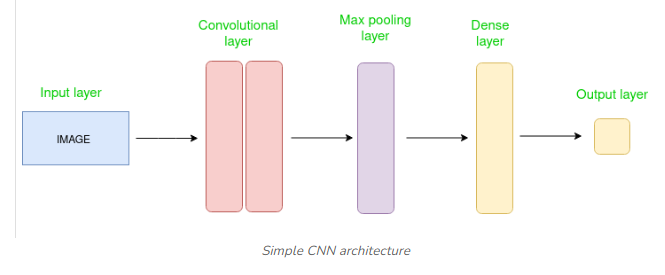

- A complete Convolution Neural Networks architecture is also known as covnets. 
- A covnets is a sequence of layers, and every layer transforms one volume to another through a differentiable function. 

Let’s take an example by running a covnets on of image of dimension 30 x 30 x 3. 

#### **Input Layer**
It’s the layer in which we give input to our model. In CNN, Generally, the input will be an image or a sequence of images. In our case the layer holds a raw input of image with width 30, height 30 and depth 3.

#### **Convolution Layers**
- Convolutional Layer extracts the feature from the input dataset. 
- It applies a set of learnable filters known as the kernels to the input images. 
- The filters/kernels are smaller matrices usually 2×2, 3×3, or 5×5 shape. 
- It slides over the input image data and computes the dot product between kernel weight and the corresponding input image patch. 
- The output of this layer is referred as feature maps.
- Suppose if we use total of 12 filters for this layer we'll get an output volume of 30x30x12.

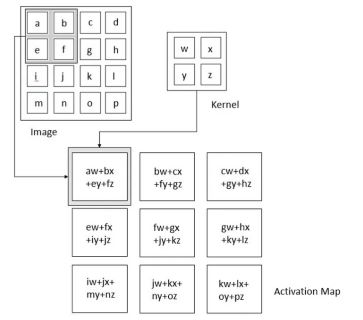

#### **Activation Layer**
activation layers add nonlinearity to the network. it will apply an element-wise activation function to the output of the convolution layer. Some common activation functions are RELU: max(0, x),  Tanh, Leaky RELU, etc. The volume remains unchanged hence output volume will have dimensions 30 x 30 x 12.

#### **Pooling Layer**
Pooling layer reduce the size of volume which makes computation fast and prevents overfitting.
Two common types of pooling layers are:
1. Max Pooling
Selects the maximum element from the region of the feature map covered by the filter.

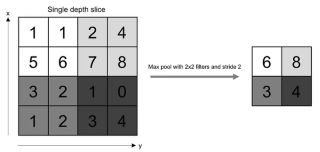

2. Average Pooling
Average pooling computes the average of the elements present in the region of feature map covered by the filter.

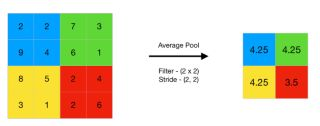

#### **Flatten Layer**
Once we have got our feature maps we need to flatten them into one-dimensional vector so that they can be passed to fully connected layers for categorization or regression.

#### **Fully Connected Layers**
It takes the input from the previous layer and computes the final classification or regression task.

#### **Output Layer**
The output from the fully connected layers is then fed into a logistic function for classification tasks like sigmoid or softmax which converts the output of each class into the probability score of each class.

In [54]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

Here we are using a binary classification problem. Our dataset contains two types of images (airplane and automobile). We want to train a model that can classiffy between the images of automobile and airplne. For completing our task we will use CNN model.

Here is a step by step guide on how we can acheive our goal:

### **1. Load images from Directory**
ur images are present in the cifar10/train directory. We will load all these images into a numpy array and the corresponding label index of each image in the abels array.

In [2]:
# Load class labels 
labels = ['airplane', 'automobile']

# Function to load images from a directory using cv2
train_dir = '/kaggle/input/cifar10/cifar10/train'

In [10]:
def load_images_from_dir(directory, labels):
    images = []
    image_labels = []
    for label in labels:
        label_dir = os.path.join(directory, label)
        image_files = glob.glob(os.path.join(label_dir, '*.png'))
        for image_file in image_files:
            img = cv2.imread(image_file)
            images.append(img)
            image_labels.append(labels.index(label))
    images = np.array(images)
    labels = np.array(image_labels)
    return images, labels

In [11]:
# Load images and their corresponding labels
images, labels = load_images_from_dir(train_dir, labels)
images.shape, labels.shape

((10000, 32, 32, 3), (10000,))

### **2. Train Test Split**
Now we will split our images into test and train set.

In [14]:
# Optional: Split into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = 42)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((8000, 32, 32, 3), (2000, 32, 32, 3), (8000,), (2000,))

### **3. Normalize the images**
Now we will standardize our images. As we know the minimum and maximum value for or images matrix that is [0-255], so we can use MinMax Scaler or we can just divide the images by 255.

In [15]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

### **4. Labels' One-Hot Encoding**

In [16]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 2)
test_labels = to_categorical(test_labels, 2)


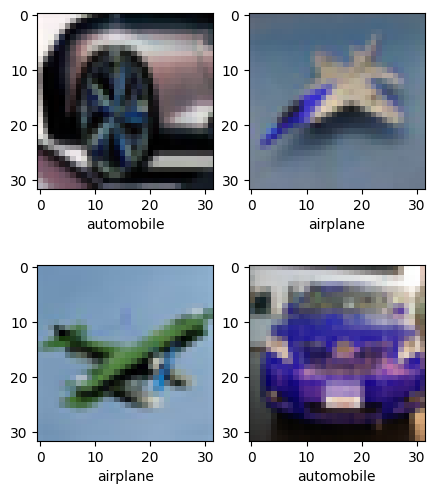

In [25]:
class_names = ['airplane', 'automobile']

# Plot the first 25 images from the training set
plt.figure(figsize = (5, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[np.argmax(train_labels[i])])
plt.show()


### **5. Define the model**
Here I am defining my model. I am using three convolutional layers with pooling layers and have a flatten layer at the end with the output.

In [30]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Display the model's architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,050 (476.76 KB)

 Trainable params: 122,050 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

### **6. Compile the model**
Now we will compile the model using Adam optimizer, categorical cross entropy loss.

In [31]:
optimizer = Adam()
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


### **7. Fit the model**

In [32]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.7159 - loss: 0.5246 - val_accuracy: 0.8605 - val_loss: 0.3272
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8857 - loss: 0.2746 - val_accuracy: 0.8935 - val_loss: 0.2496
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9113 - loss: 0.2121 - val_accuracy: 0.9160 - val_loss: 0.2023
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9330 - loss: 0.1625 - val_accuracy: 0.9160 - val_loss: 0.1993
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9461 - loss: 0.1367 - val_accuracy: 0.9295 - val_loss: 0.1826
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9558 - loss: 0.1226 - val_accuracy: 0.9215 - val_loss: 0.1957
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9614 - loss: 0.1036 - val_accuracy: 0.9370 - val_loss: 0.1799
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9663 - loss: 0.0867 - val_accu

### **8. Evaluate the model**

In [33]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
loss, acc

63/63 - 0s - 7ms/step - accuracy: 0.9260 - loss: 0.2089


(0.20893871784210205, 0.9259999990463257)

Our testing loss is 0.2 while training accuracy is 92% which shows that our data has been well-trained. We can also get a better idea qanout our data by plotting te accuray and loss against epochs.

### **9. Visualize Accuracy and loss**

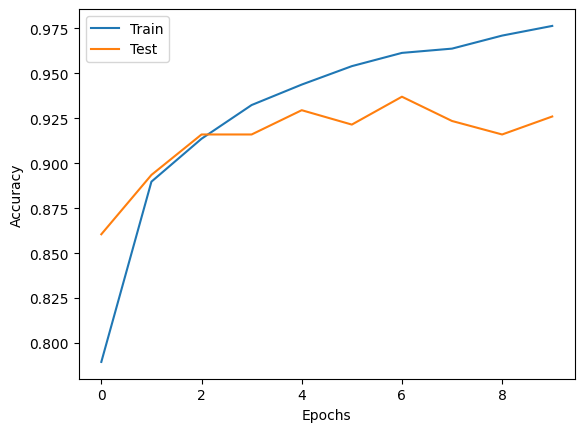

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

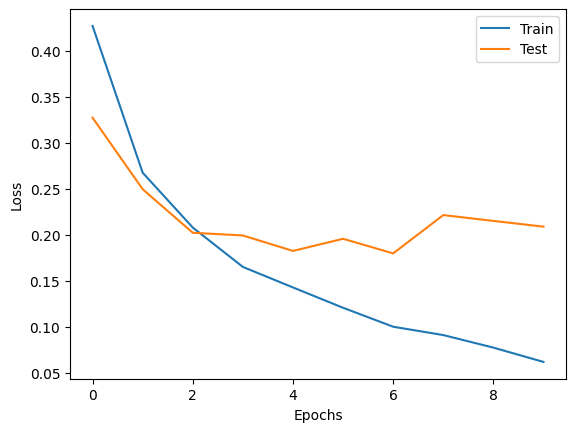

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

By looking at the above plots we can see that our model performance is quite satisfactory and doesnot need any more modifications.

### **10. Save the model**
Now we wil save our trained model using `models.load_model`. So that we can also load it  again and use it.

In [36]:
# Save the model
model.save('model.h5')

---
# **IMAGE AUGMENTATION**
Computer vision and deep learning employ image augmentation as a method that enhances the size and diversity of training dataset by introducing various transformations on the existing images. The major goal of image augmentation is to add randomness into training data set, thus helping generalization of the model and reducing overfitting.

### **Why You Should Use Image Augmentation?**

**To Avoid Overfitting:** With the incorporation of minor changes in training images, the model tends to rely less on memorizing the training data while enhancing its ability to generalize well when applied using new, unseen data.

**Model Robustness:** The augmented images mimic various conditions like rotation or brightening and noise thus enabling the model to withstand real world variations.

**Dataset Size Expansion:** In cases where datasets have few or a limited number of images available, augmentation can create large amounts of training sets without having to collect any more data.

### **Common Image Augmentation Techniques**
Here are some of the most common transformations applied during image augmentation:

1. **Rotation**: Rotating the image by a certain angle.

2. **Flipping**: Flipping the image horizontally or vertically.
  
3. **Shifting**: Translating the image horizontally or vertically.

4. **Rescaling**: Scaling pixel values, typically used to normalize the pixel intensity.
   
5. **Cropping**: Randomly cropping a portion of the image.

Image augmentation is commonly implemented using libraries like TensorFlow, Keras, or OpenCV. In Keras, for example, the `ImageDataGenerator` class is used for image augmentation:

Here is complete guide on how we can do that.

**Load the image and convert it to a numpy array.**

In [37]:
# Load an image
img = load_img('/kaggle/input/images/image.PNG') 
x = np.array(img)  
x = np.expand_dims(x, axis=0)  

**Use `ImageDataGenerator` and apply all the augmentation techniques we want to apply on the iamge.**

In [43]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)


In [44]:
datagen.flow(x, batch_size=1, save_to_dir='/kaggle/working/', save_prefix='aug', save_format='jpeg')

**Generate and Visualize the augmented images.**

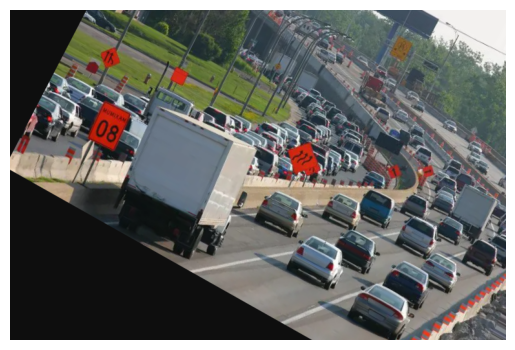

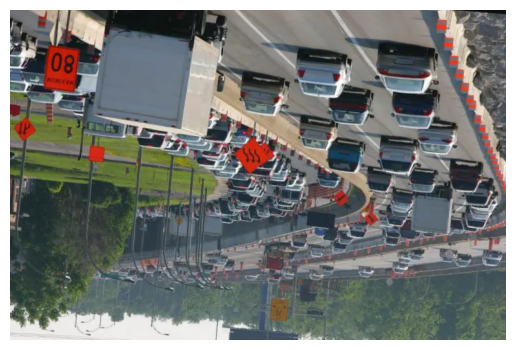

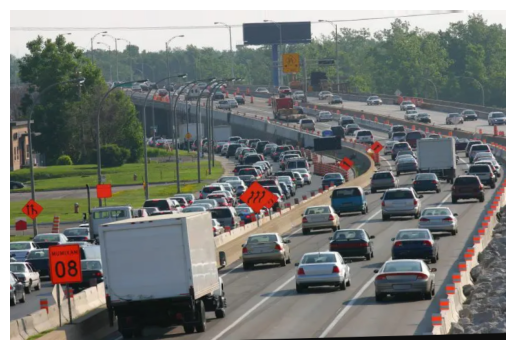

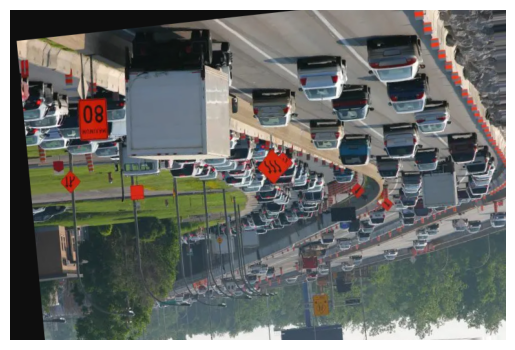

In [53]:
for i in range(4):
    augmented_image = datagen.random_transform(x[0])
    plt.imshow(array_to_img(augmented_image))
    plt.axis('off')
    plt.show()


So in this way we can generate the augmented images to make our model robust and avoid overfitting.

---
# **IMAGE SEGMENTATION**

## **Thresholding with OpenCV**
One way of doing image segmentation is thresholding. 
- Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. 
- In thresholding, each pixel value is compared with the threshold value. 
- If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). 
- Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. 
- A threshold is a value which has two regions on its either side i.e. below the threshold or above the threshold. 

Here is a basic pseudo code of thresholding works.

#### **If f (x, y) < T, then: f (x, y) = 0**
#### **else: f (x, y) = 255**
#### **where,**
#### **f (x, y) = Coordinate Pixel Value**
#### **T = Threshold Value.**

In OpenCV with Python, the function cv2.threshold is used for thresholding. Here is the syntax:

#### **`cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique)`**
- `source`: Input Image array (must be in Grayscale). 
- `thresholdValue`: Value of Threshold below and above which pixel values will change accordingly. 
- `maxVal`: Maximum value that can be assigned to a pixel. 
- `thresholdingTechnique`: The type of thresholding to be applied. 
 
 
 Different Thresholding Techniques are as follows:
 
1. `cv2.THRESH_BINARY`: If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
2. `cv2.THRESH_BINARY_INV`: Inverted or Opposite case of cv2.THRESH_BINARY.
3. `cv.THRESH_TRUNC`: If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
4. `cv.THRESH_TOZERO`: Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
5. `cv.THRESH_TOZERO_INV`: Inverted or Opposite case of cv2.THRESH_TOZERO.

Here is a step by step guide on how we can do image segmentation using thresholding.First import cv2 module.

#### **Load the image**
Now we will load our image on which we want to do image segmentation.

In [94]:
image = cv2.imread('/kaggle/input/images-data/image.PNG')
image

array([[[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [ 14,  14,  14],
        [ 14,  14,  14],
        [108, 108, 107]],

       [[247, 159, 119],
        [248, 158, 118],
        [247, 158, 118],
        ...,
        [251, 177, 137],
        [250, 176, 136],
        [108, 108, 107]],

       [[252, 171, 131],
        [254, 172, 131],
        [252, 169, 128],
        ...,
        [250, 171, 127],
        [249, 170, 126],
        [108, 108, 107]],

       ...,

       [[  2,  23,  17],
        [  5,  22,  20],
        [  3,  16,  18],
        ...,
        [  0,  16,   7],
        [  0,  16,   7],
        [102, 102, 102]],

       [[  2,  22,  18],
        [  5,  23,  18],
        [  4,  18,  17],
        ...,
        [  0,  16,   8],
        [  0,  16,   7],
        [ 95,  95,  95]],

       [[  2,  24,  16],
        [  3,  18,  16],
        [  4,  14,  17],
        ...,
        [  0,  16,   8],
        [  0,  16,   8],
        [112, 112, 112]]

From the above output we ca nsee that we have got a 3D image which shows that we have a coloured iamge. We can also see it with the help of cv2 and matplotlib.

When image is loaded using cv2 it is in Blue Red Green format, so to visualize it we need to convert it to Red Green Blue

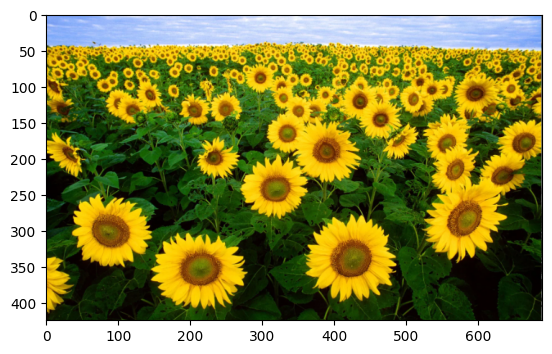

In [95]:
image1_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image1_rgb)
plt.show()


#### **Convert to Grey Scale:**
Now we have to convert our image to grey scale using cv2.cvtColor.

In [80]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [81]:
img

array([[ 14,  14,  14, ...,  14,  14, 108],
       [157, 156, 156, ..., 173, 172, 108],
       [168, 169, 166, ..., 167, 166, 108],
       ...,
       [ 19,  19,  15, ...,  11,  11, 102],
       [ 19,  19,  16, ...,  12,  11,  95],
       [ 19,  16,  14, ...,  12,  12, 112]], dtype=uint8)

In [82]:
# Get the minimum and maximum pixel values along with their locations
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img)
min_val, max_val

(0.0, 254.0)

Now we can see that our iamge has been converted to grey scale as the pixel range has now benn decreased to 0-254 and we have got a 2D mar=trix for our image.

#### **Apply Thresholding:**
Now we apply thresholding to our iamge. We will explore all the techniques one by one.

The function `cv.threshold` is used to apply the thresholding. 

- The first argument is the source image, which should be a grayscale image. 
- The second argument is the threshold value which is used to classify the pixel values. 
- The third argument is the maximum value which is assigned to pixel values exceeding the threshold.
- OpenCV provides different types of thresholding which is given by the fourth parameter of the function.
- The method returns two outputs. The first is the threshold that was used and the second output is the thresholded image.

In [83]:
thresh, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
thresh, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) 
thresh, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) 
thresh, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO) 
thresh, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

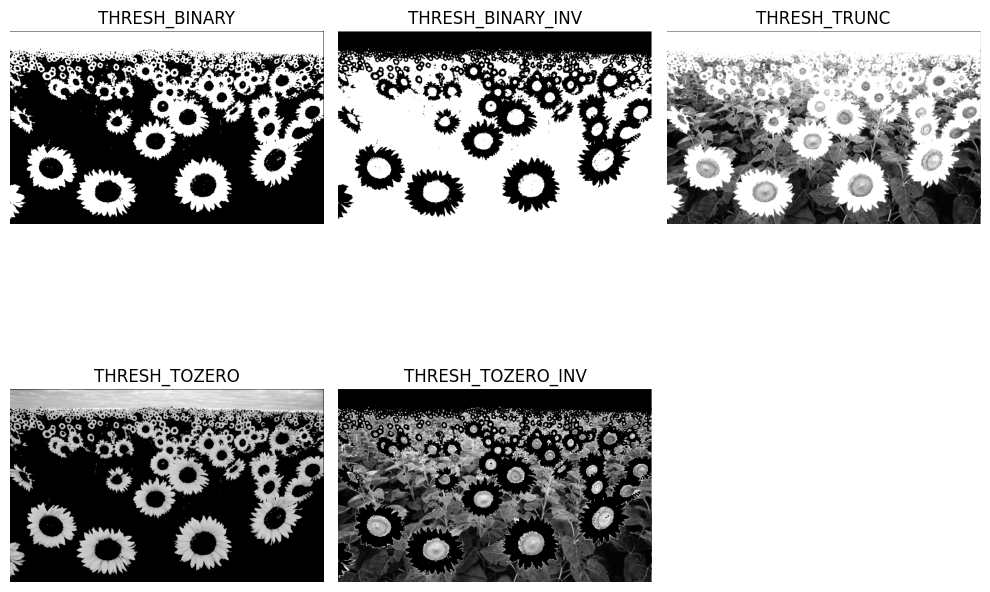

In [84]:
# Create a list of the thresholded images and their titles
images = [thresh1, thresh2, thresh3, thresh4, thresh5]
titles = ['THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 
          'THRESH_TOZERO', 'THRESH_TOZERO_INV']

# Display the images using Matplotlib
plt.figure(figsize=(10, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


## **K-means Clustering**
K Means is a clustering algorithm. Clustering algorithms are unsupervised algorithms which means that there is no labelled data available. It is used to identify different classes or clusters in the given data based on how similar the data is. Data points in the same group are more similar to other data points in that same group than those in other groups. 

#### **Read the image and convert to RGB Format**

In [125]:
image = cv2.imread('/kaggle/input/images-data/image.PNG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

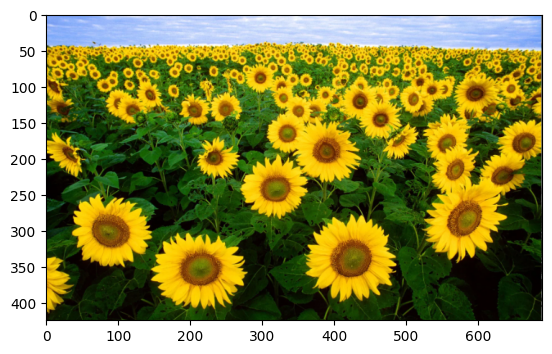

In [126]:
# Display the result
plt.imshow(image)
plt.show()


#### **Reshape image to 2D**
For now our image is in 3D we need to convert it into 2D. We will reshape our image from 3D to 2D and then convert the pixel values to float type.

In [104]:
pixels = image.reshape((-1, 3))

pixels = np.float32(pixels)

In [105]:
pixels

array([[ 14.,  14.,  14.],
       [ 14.,  14.,  14.],
       [ 14.,  14.,  14.],
       ...,
       [  8.,  16.,   0.],
       [  8.,  16.,   0.],
       [112., 112., 112.]], dtype=float32)

#### **Define the criteria**
We need to define the number of clusters in which we want to partition our data.
- `cv2.TERM_CRITERIA_EPS`: The algorithm stops when the specified accuracy (epsilon, 0.85 in this case) is reached.
- `cv2.TERM_CRITERIA_MAX_ITER`: The algorithm stops after a maximum number of iterations (100 in this case).
- The sum `cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER` tells OpenCV to stop the algorithm when either the accuracy or the maximum number of iterations is reached.
- The third parameter, 0.85, is the epsilon value, which is the required accuracy. If the change in cluster centers is smaller than this value, the algorithm will stop.

In [119]:
# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.90)
k = 2

#### **Apply kmeans**

In [120]:
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [115]:
labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [111]:
cv2.minMaxLoc(labels)

(0.0, 5.0, (0, 0), (0, 26526))

We can see that total six clusters have been created from 1 to 5, and similarly we have six centers one for each cluster.

In [116]:
centers

array([[ 15,  27,   3],
       [121,  97,  10],
       [245, 200,  10],
       [186, 207, 249],
       [ 46,  86,  13],
       [189, 149,  10]], dtype=uint8)

In [121]:
# Convert back to 8 bit values
centers = np.uint8(centers)

Now we need to map all the pixel values to the centers. for this we will first convert our 2D labels to 1D array. 

Then we will use `centers[labels.flatten()]`: This line maps each label to its corresponding cluster center. The centers array contains the RGB values of the cluster centers (which represent the dominant colors in the image after clustering). By indexing centers with labels.flatten(), we replace each pixel label with the corresponding cluster center's color.

In [122]:
labels.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [123]:
# Map the labels to the center values
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

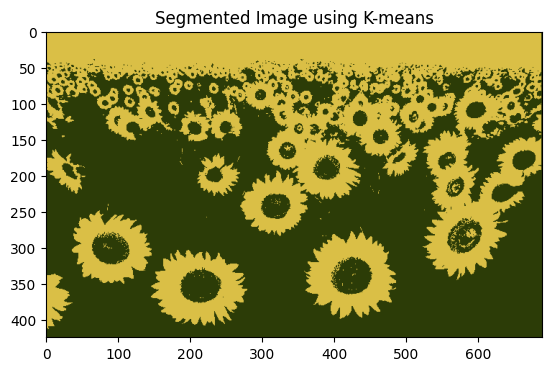

In [124]:
# Display the result
plt.imshow(segmented_image)
plt.title('Segmented Image using K-means')
plt.show()

Here we can see that because we used 2 clusters only two colours can be seen in the segmented image. As we add more k the image is divided into more segments.

---
# **IMAGE DENOISING**
Image denoising is part of the image processing field, which deals with removing or reducing noise from an image. There are various sources that lead to noise in images including bad light condition, high ISO in cameras, errors during transmission or imperfect sensors. Image De-noising goal is to recover that original image which has become noisy over the period of time by dampening or eliminating those noises yet keeping each minute details and structures preserved in an clean form.

### **Techniques for Image Denoising**

**1. Averaging Filter:**

A straightforward technique that updates every pixel by computing average of its neighbors. This approach smoothens the image however also blurs intersections.

**2. Gaussian Blur:**

A filter that first applies a Gaussian function to blur an image and reduce the noise of the picture >> It makes the image clearer without loss of edges as others filter does.

**3. Median Filter:**

Instead, it replaces every pixel with the median of those around. It is mainly effective in the removal of salt-and-pepper noise, yet preserves highly optimized edges.

**4. Bilateral Filter:**

Smoothes the image but keeps edges sharp by using an edge-preserving smoothing filter. The intensity difference and its spatial distance are both concerned.

In [86]:
from skimage import io, img_as_float
from skimage.restoration import denoise_bilateral, denoise_wavelet, estimate_sigma

For demonstrating denoising techniques I am adding some noise to an image 

In [55]:
# Load an image
image = cv2.imread('/kaggle/input/images-data/image.PNG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

`noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)`:

- Generates a noise array with the same shape as the input image using a Gaussian distribution.
- np.random.normal(mean, sigma, image.shape) creates a noise matrix with values drawn from a Gaussian distribution with the specified mean and sigma.
- .astype(np.uint8) converts the noise array to unsigned 8-bit integers, which is the format used for image pixel values.

In [56]:
noise = np.random.normal(0, 1, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)

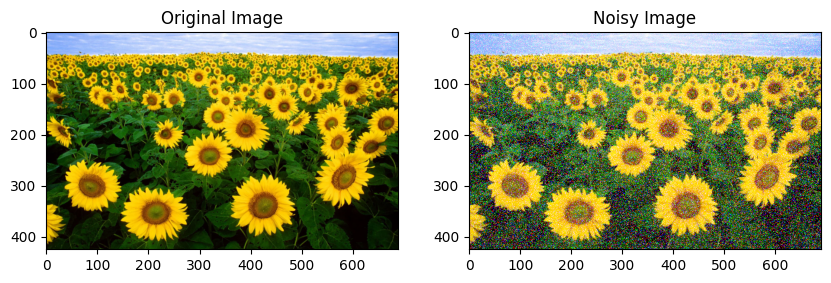

In [57]:
# Display the original and noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.show()


Now we can see that we have added some noise to our image. Now we willapply different denoising techniques on this image and see the results.

## **1. Averaging Filter**
A mean filter is also a basic image processing technique to clean an input picture for better analysis. The model works by smoothening out the value of each pixel, with its surrounding pixels and it does so by averaging them together. This process will blur the image to get rid of high-frequency noise as well as smoothing out variations in it.

- This is used for smoothing the image (for noise reduction) The method is simple and computationally faster

- It causes char edges and details while applying a blur plus high frequency noise reduction.

- Kernel Size — this size governs how smooth your smoothing is. The greater the kernel size, The more blurring process occurs.

We can use cv2.blur to use averaging filter in cv2. Here I am using a kernel size of 4.

In [58]:
averaging_denoised = cv2.blur(noisy_image, (4, 4))

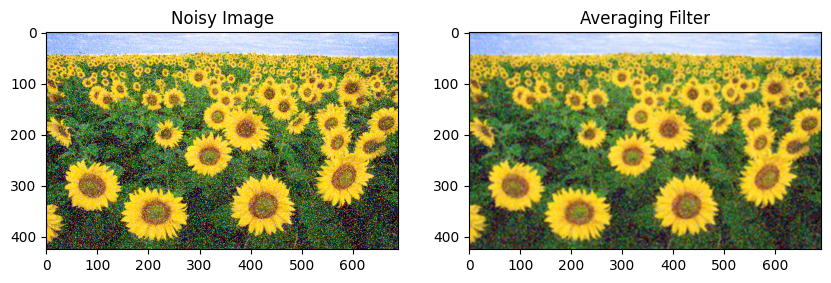

In [59]:
# Display the original and noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image)

plt.subplot(1, 2, 2)
plt.title('Averaging Filter')
plt.imshow(averaging_denoised)
plt.show()


## **2. Gaussian Blur**
One of the commonly used Image Processing technique is Gaussian blur, which smooths an image by reducing high frequency noise and details. This applies a Gaussian image function, which is basically a bell-shaped curve that gives more importance to the pixels in the center and less towards those far away. Which makes it a smoother filter, also preserving edges much better than just plain averaging.

Here’s how you can apply Gaussian blur using OpenCV in Python:



In [62]:
# Apply Gaussian Blur
gaussian = cv2.GaussianBlur(noisy_image, (5, 5), 0)


Gaussian Blur: This function performs the convolution with a 5x5 Gaussian kernel on noisy_image. The result is a pixel which represents the average of all other pixels surrounding that 5x5 mask, with weighted by Gaussian function.

Blurring Effect: The blurring effect will make the image less noisy, and smoother post-processing details. The standard deviation is set to 0, in this case the function uses a default value calculated from the kernel size.

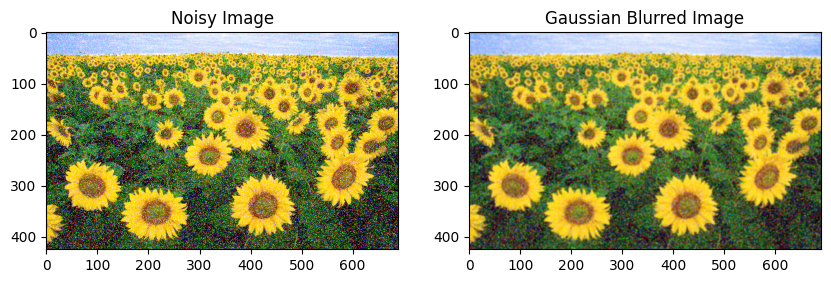

In [63]:
# Display the original and noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image)


plt.subplot(1, 2, 2)
plt.title('Gaussian Blurred Image')
plt.imshow(gaussian)
plt.show()


## **3. Median Blur**
Median blur is an image processing strategy targeted at reducing noise while conserving edges. It proves to be useful in the case of eliminating salt and pepper noise from an image. Contrary to the averaging filters, which replace pixel values by the average of their neighbors, the median blur replaces each pixel's value by the median value of pixel values in its neighborhood.

Here’s an example of how to apply median blur using OpenCV in Python:



The code below applies a median blur to the noisy_image using OpenCV's cv2.medianBlur function.

**Applies Median Blur:** The cv2.medianBlur function processes the noisy_image by sliding a 5x5 kernel over the entire image. For each pixel, the function extracts a 5x5 neighborhood, sorts the pixel values in this neighborhood, and replaces the central pixel with the median value from the sorted list.

**Noise Reduction:** The median blur helps to reduce noise, especially salt-and-pepper noise, while preserving edges. It does this by removing outlier values (noise) and keeping the central pixel value closer to the median of the neighboring pixels.

In [66]:
# Apply Median Blur
median = cv2.medianBlur(noisy_image, 5)

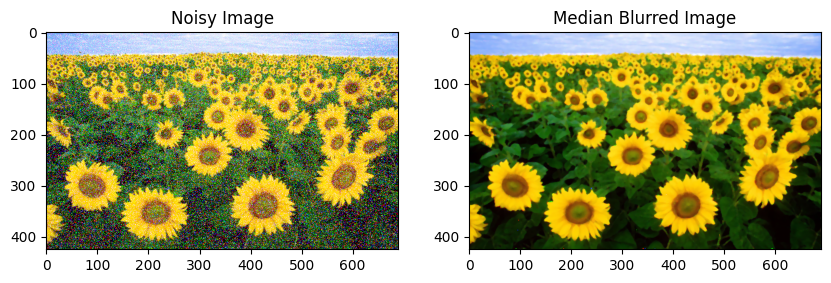

In [67]:

# Display the original and noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image)

plt.subplot(1, 2, 2)
plt.title('Median Blurred Image')
plt.imshow(median)
plt.show()


## **4. Bilateral Filter**
The bilateral filter works in two domains. One is a spatial domain, and the other is an intensity domain. It considers the distance of pixels within a neighborhood. The influence on the output pixel value by pixels closer to the center of the filter is more significant.
Intensity Domain:

This domain deals with the similarity in intensity or gray level between the central pixel and its neighbors. In other words, pixels having intensity values similar to that of the central pixel bear greater influence on the output pixel value.


In [70]:
d = 10
sigmaColor = 50
sigmaSpace = 50
bilateral = cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace)

**d:** Diameter of the pixel neighborhood. Larger values result in more smoothing.

**sigmaColor:** Standard deviation of the Gaussian function used in the intensity domain. Controls how much difference in intensity values influences the smoothing.

**sigmaSpace:** Standard deviation of the Gaussian function used in the spatial domain. Controls how far pixels influence each other based on their spatial distance.

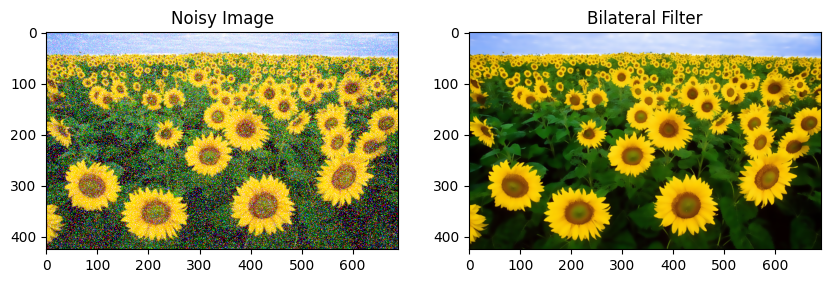

In [71]:

# Display the original and noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image)

plt.subplot(1, 2, 2)
plt.title('Bilateral Filter')
plt.imshow(bilateral )
plt.show()
